# Mushroom

## Mushrooms are a rich, low calorie source of fiber, protein, and antioxidants. Mushrooms make a delicious addition to pizza, pasta, salads, and more.They’re marvelous on pizza and decadent in soups and sauces, but if you’re about to cook with mushrooms you picked yourself, proceed with caution.The most common dangerous mushrooms are those belonging to the Amanita genus, especially Amanita phalloides, aptly called “death cap” mushrooms. They contain toxic compounds called amatoxins that damage liver cells.


![Mushroom](https://kj1bcdn.b-cdn.net/media/45838/thumbnail-march-2021-22-1.jpg)

### This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.


### In this project we need to predict the "Class" column

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

#cross validation
from sklearn.model_selection  import cross_val_score as CVS

#ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


## Importing Dataset and Data Information

In [2]:
# load dataset

mushroom = pd.read_csv("mushrooms.csv")

#first five rows of the dataset
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# Shape of dataset

mushroom.shape

(8124, 23)

#### There are 8124 rows and 23 coloumns in our dataset

In [4]:
# data information

mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

####  - Our dataset has no missing values
####  - All the columns have non numerical data 

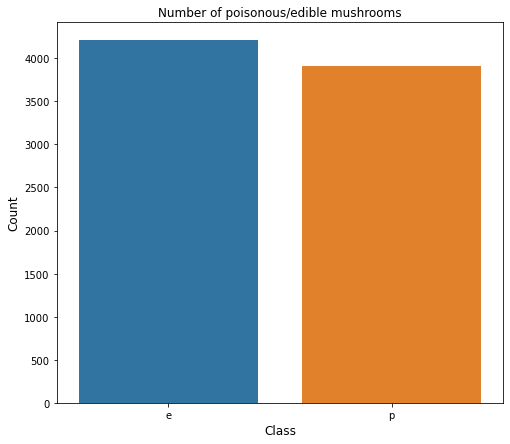

In [5]:
# visualize the count of edible and poisonous mushrooms using Seaborn
count = mushroom['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
plt.show()

####  ‘e’ and ‘p’ represents the count of the unique values i.e. 4208 and 3916 respectively. From the bar plot, we see that the dataset is balanced.

<AxesSubplot:xlabel='cap-shape', ylabel='count'>

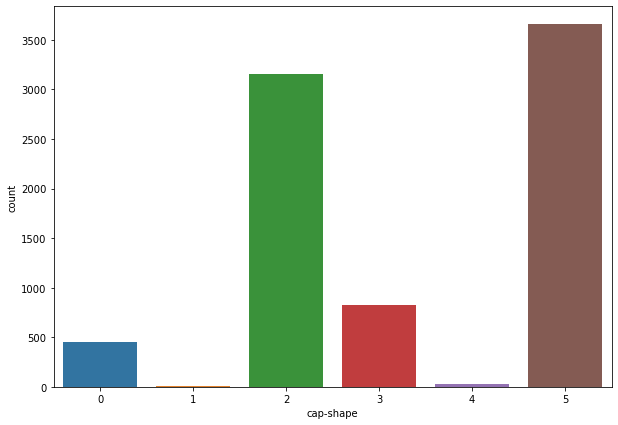

In [20]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(data=mushroom,x='cap-shape')

<AxesSubplot:xlabel='cap-shape', ylabel='count'>

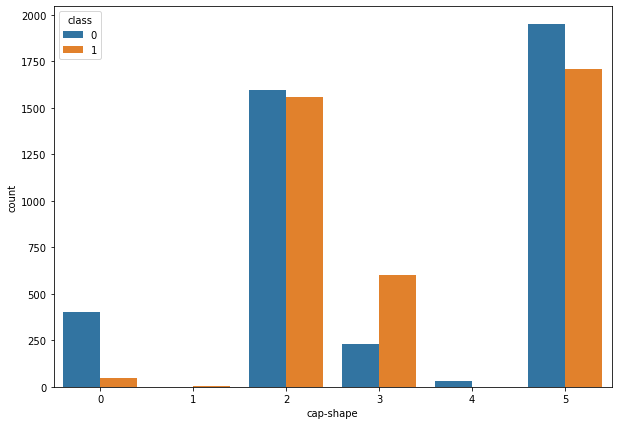

In [22]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(data=mushroom,x='cap-shape',hue='class')

In [23]:
mushroom.groupby('cap-shape')['class'].value_counts()

cap-shape  class
0          0         404
           1          48
1          1           4
2          0        1596
           1        1556
3          1         600
           0         228
4          0          32
5          0        1948
           1        1708
Name: class, dtype: int64

#### - all conical mushrooms are poisonous
#### - all sunken mushrooms edible

## Data Manipulation
#### The data is categorical so we’ll use LabelEncoder to convert it to ordinal. LabelEncoder converts each value in a column to a number.

In [6]:
#Stats of dataset

mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
mushroom = mushroom.astype('category')
mushroom.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [8]:
#intialize label encoder
LE = LabelEncoder()

#change the categorical varaiables to numerical variables
labelencoder=LabelEncoder()
for column in mushroom.columns:
    mushroom[column] = LE.fit_transform(mushroom[column])
    
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


#### We see that all the column values are converted to ordinal and there are no categorical values left!
#### Also, the column “veil-type” is 0 and not contributing to the data so we’ll remove it.

In [9]:
mushroom['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32

In [10]:
mushroom = mushroom.drop(['veil-type'], axis=1)

## Data Visualisation

<AxesSubplot:>

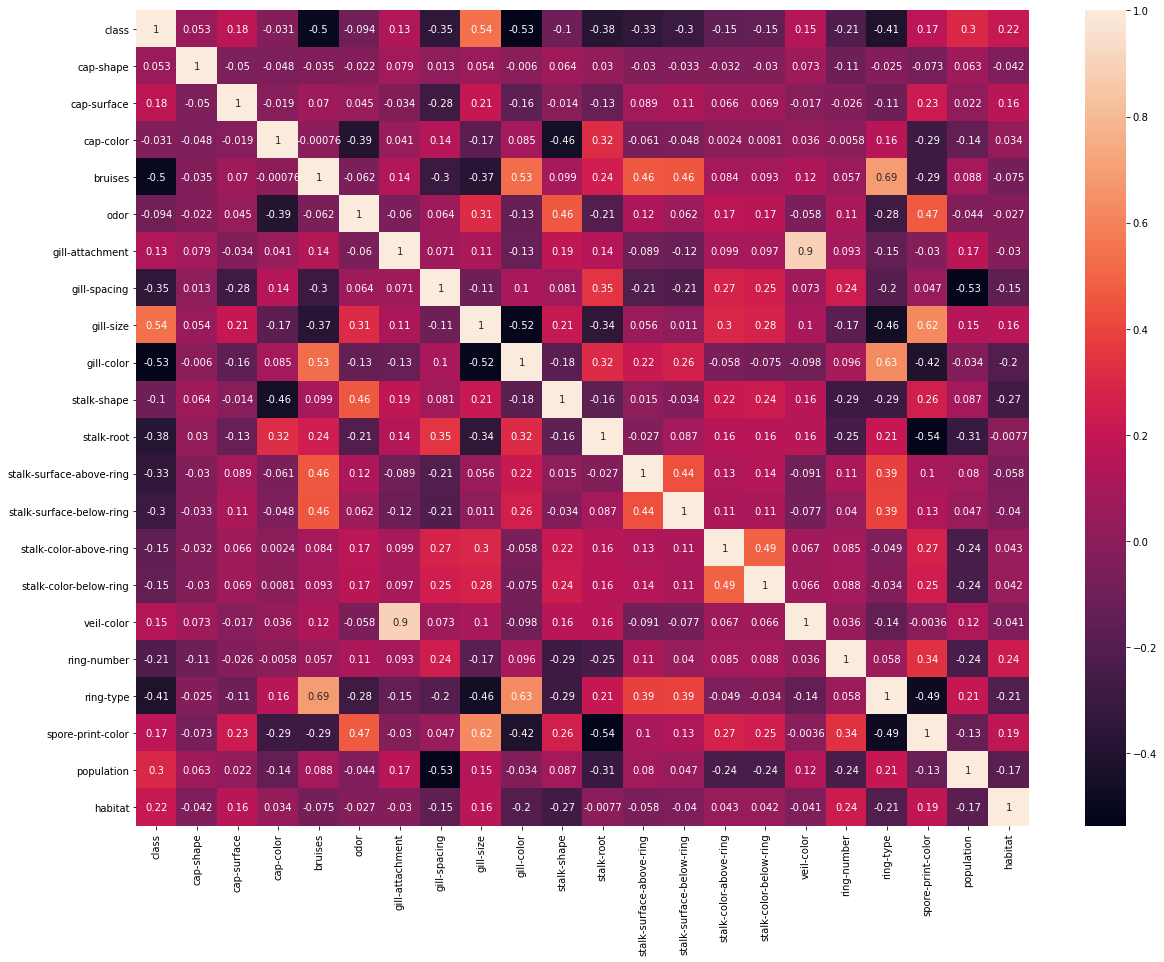

In [11]:
plt.figure(figsize=(20,15))
sns.heatmap(mushroom.corr(), annot=True,)

## Train test split

In [12]:
X = mushroom.drop(['class'], axis=1)
y = mushroom['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

## Finding the best algorithm:

In [13]:
# LogisticRegression

lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

# Classification report of Logistic Regression Classifier
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Test Accuracy: 94.96%
Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.96      0.94      0.95       433
           1       0.94      0.96      0.95       380

    accuracy                           0.95       813
   macro avg       0.95      0.95      0.95       813
weighted avg       0.95      0.95      0.95       813



In [14]:
# DecisionTreeRegressor

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy: 100.0%


In [15]:
#RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))

Test Accuracy: 100.0%
Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [16]:
# AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier

ada= AdaBoostClassifier(n_estimators = 100)
print(ada)
ada.fit(X_train, y_train)
predada = ada.predict(X_test)
print("Test Accuracy: {}%".format(round(ada.score(X_test, y_test)*100, 2)))
print("Random Forest Classifier report: \n\n", classification_report(y_test, predada))

AdaBoostClassifier(n_estimators=100)
Test Accuracy: 100.0%
Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [17]:
#  KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predknn = knn.predict(X_test)
        
print("Test Accuracy: ", accuracy_score(predknn, y_test))
print("KNN Classifier report: \n\n", classification_report(y_test, predknn))



Test Accuracy:  0.998769987699877
KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



###  Most of the classification methods hit 100% accuracy with this dataset.

### Also, from the classifier report we saw that our train and test data is balanced.

## Save the model

In [18]:
import pickle

filename = 'mushroom.pkl'
pickle.dump(dt,open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,

 ## Predictions

In [19]:
# Predicting some of the X_test results and matching it with true i.e. y_test values using Decision Tree Classifier.

a = np.array(y_test)
predicted = np.array(y_pred_dt)
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con

,orginal,predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
808,0,0
809,1,1
810,1,1
811,1,1


#### As we can see, the predicted and the true values match 100%.
### Woohoo! Congratulations!!! We can now eat healthy mushrooms!! YAY!

![mush](https://www.jokejive.com/images/jokejive/be/bed032c25e287d303cc883857b4d7a4e.jpeg)
